In [2]:
import sympy
sympy.init_printing()
import verify_2

# Section 1 - Differentiation

We can derive symbolic expressions

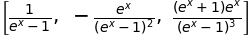

In [2]:
def demo_1a():
    x = sympy.Symbol('x',real=True)
    func = 1/(sympy.exp(x)-1)
    display([func, func.diff(x), func.diff(x,2).simplify()])
demo_1a()

__Exercise a__

An airline has a limit on the sum of the dimensions of checked luggage (height+width+length) $H+W+L=S$. Also, from asthetic reasons, the height has to be twice as large as the width. What is the width of a suitcase that meets this criterion that would maximised the volume?

In [36]:
def exercise_1a():
    
    H = sympy.Symbol('H', positive=True) # Height
    W = sympy.Symbol('W', positive=True) # Width
    L = sympy.Symbol('L', positive=True) # Length
    S = sympy.Symbol('S', positive=True) # Sum of all dimensions
    cond1 = sympy.Eq(S,H+W+L)
    cond2 = sympy.Eq(H,2*W)
    
    temp = H*W*L
    temp = temp.subs(sympy.solve(cond1,L,dict=True)[0])
    temp = temp.subs(sympy.solve(cond2,H,dict=True)[0])
    display(temp)
    temp = temp.diff(W)
    display(temp)
    temp = sympy.solve(temp, W)[0]
    display(temp)
    
    # Enter answer here
    answer = temp
    display(answer)
    print(verify_2.verify_1a(answer))
exercise_1a()

True


__Exercise b__

In this exercise we reproduce the reflection and transmission coefficients of a quantum mechanical particle wave according to the Schroedinger equation. The potential is $V\left(x\right) = V_0 \Theta \left(x\right)$, so waves are coming from the left and scatter off from the potential step. Use continuity and differentiability to

I) Find the reflection coefficient

II) Find the transmission coefficent

In [3]:
def exercise_1b():
    
    m = sympy.Symbol('m', positive=True) # Particle mass
    h = sympy.Symbol('h', positive=True) # Planck constant
    E = sympy.Symbol('E', positive=True) # Particle energy
    V_0 = sympy.Symbol('V_0', positive=True) # Potential step
    R = sympy.Symbol('R') # Reflection coefficient
    T = sympy.Symbol('T') # Transmission coefficient
    x = sympy.Symbol('x', real=True) # Position
    left_wave = sympy.exp(sympy.I*x*sympy.sqrt(2*m*E)/h) + R*sympy.exp(-sympy.I*x*sympy.sqrt(2*m*E)/h)
    right_wave = T*sympy.exp(sympy.I*x*sympy.sqrt(2*m*(E-V_0))/h)
            
    # Enter answer here
    answer_I = 0
    print(verify_2.verify_1bI(answer_I))
    
    answer_II = 0
    print(verify_2.verify_1bII(answer_II))

exercise_1b()

False
False


sympy will delay the excution of derivatives as much as possible. You can force it to perform differentiations with the doit command

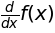

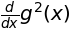

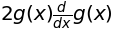

In [5]:
def demo_1b():
    
    f = sympy.Function('f')
    g = sympy.Function('g')
    x = sympy.Symbol('x')
    temp = f(x)
    display(temp)
    temp = temp.diff(x)
    display(temp)
    temp = temp.subs(f(x),g(x)**2)
    display(temp)
    temp = temp.doit()
    display(temp)
demo_1b()

To create an unevaludated derivative, use the Derivative class

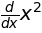

In [6]:
def demo_1c():
    
    x = sympy.Symbol('x', real=True)
    func = x**2
    temp = sympy.Derivative(func,x)
    display(temp)
    display(temp.doit())
    
demo_1c()

# Section 2 - Integration

Indefinite integrals

In [7]:
def demo_2a():
    x = sympy.Symbol('x', real=True)
    func = x**2+x*sympy.cos(2*x)
    display([func, func.integrate(x)])
demo_2a()

Definite integrals

In [8]:
def demo_2b():
    x = sympy.Symbol('x', real=True)
    func = x**3+x**4
    display(func.integrate((x,5,6)))
demo_2b()

Improper integrals

In [9]:
def demo_2c():
    x = sympy.Symbol('x', real=True)
    func = sympy.exp(-x**2)
    display(func.integrate((x,0,sympy.oo)))
demo_2c()

Again, sympy can't do magic, so if an integral is not straightforward sympy will fail. As a rule of thumb, if you won't be able to do the integral, so sympy won't as well. Another issue is that the integral might give branching results depending on the values of the integration parameters

In [10]:
def demo_2d():
    x = sympy.Symbol('x', real=True)
    a = sympy.Symbol('a', real=True)
    func = x**a
    display(func.integrate(x))
demo_2d()

⎧ a + 1            
⎪x                 
⎪──────  for a ≠ -1
⎨a + 1             
⎪                  
⎪log(x)  otherwise 
⎩                  

The ambiguity can be eliminated by imposing qualifiers on the variables

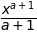

In [11]:
def demo_2e():
    x = sympy.Symbol('x', real=True)
    a = sympy.Symbol('a', positive=True)
    func = x**a
    display(func.integrate(x))
demo_2e()

__Exercise a__

A massless particle moves in a straight line next to a gravitating mass $M$. Neglecting the changes to the particle's trajectory, find the net change in downward velocity

In [12]:
def exercise_2a():
    
    G = sympy.Symbol('G', positive=True) # Gravitation constant
    M = sympy.Symbol('M', positive=True) # Mass
    t = sympy.Symbol('t', positive=True) # Time
    b = sympy.Symbol('b', positive=True) # Impact parameter
    v = sympy.Symbol('v', positive=True) # Particle velocity
    
    acceleration = G*M*b/(v**2*t**2+b**2)**sympy.Rational(3,2)
    
    # Answer
    answer = 0
    display(answer)
    print(verify_2.verify_2a(answer))
exercise_2a()

False


# Section 3 - Series Expansion

Expansing a function as a power series

In [13]:
def demo_3a():
    x = sympy.Symbol('x', real=True)
    func = sympy.exp(x)
    display(sympy.series(func,x,0,6))
demo_3a()

To get rid of that annoying big O at the end use removeO

In [14]:
def demo_3b():
    x = sympy.Symbol('x', real=True)
    func = sympy.exp(x)
    display(sympy.series(func,x,0,6).removeO())
demo_3b()

You can also expand about infinity

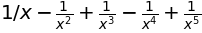

In [15]:
def demo_3c():
    x = sympy.Symbol('x', real=True)
    func = 1/(x+1)
    display(sympy.series(func,x,sympy.oo,6).removeO())
demo_3c()

Series expansion doesn't handle exponentials and logarithms very well. Also, if we have an unknown power $x^{\alpha}$ then sympy wouldn't know how to treat it.

__Exercise a__

Two negative charge $-Q$ are placed at $x=\pm s$ and $y=0$. One positive charge $2 Q$ is placed at the origing. Find the leading term in the potential at large distances $r \gg s$

potential


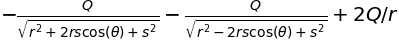

expansion


False


In [16]:
def exercise_3a():
    
    s = sympy.Symbol('s', positive=True) # Separation
    Q = sympy.Symbol('Q', positive=True) # Charge
    r = sympy.Symbol('r', positive=True) # Radius
    q = sympy.Symbol('theta', positive=True) # Angle
    
    potential = 2*Q/r-Q/sympy.sqrt(r**2+s**2+2*s*r*sympy.cos(q))-Q/sympy.sqrt(r**2+s**2-2*s*r*sympy.cos(q))
    print('potential')
    display(potential)
    
    # Answer
    print('expansion')
    answer = 0
    display(answer)
    print(verify_2.verify_3a(answer))
    
exercise_3a()

# Section 4 - Limits

Sympy can also calculate limits

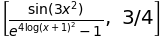

In [17]:
def demo_4a():
    
    x = sympy.Symbol('x', real=True)
    func = sympy.sin(3*x**2)/(sympy.exp(4*sympy.log(1+x)**2)-1)
    display([func,sympy.limit(func,x,0)])
demo_4a()

It is also possible to define the direction of the limit

In [18]:
def demo_4b():
    
    x = sympy.Symbol('x', real=True)
    display([sympy.limit(1/x, x, 0, '+'),sympy.limit(1/x, x, 0, '-')])
demo_4b()

The limit from Mean Girls!

![Image of Yaktocat](http://2.bp.blogspot.com/-4JW7IxX0wQI/TbdCDfAUN2I/AAAAAAAAAFc/LBn2mnz8zVw/s1600/Mean+Girls.png)

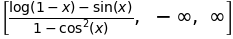

In [19]:
def mean_girls_limit():
    
    x = sympy.Symbol('x')
    func = (sympy.log(1-x) - sympy.sin(x))/(1-sympy.cos(x)**2)
    display([func,sympy.limit(func,x,0,'+'),sympy.limit(func,x,0,'-')])
mean_girls_limit()

__Exercise a__

Find the limit $\lim_{x\rightarrow 0}\frac{\sin x}{x}$

In [20]:
def exercise_4a():
    
    x = sympy.Symbol('x', real=True)
    
    func = sympy.sin(x)/x
    
    answer = 0
    display(answer)
    print(verify_2.verify_4a(answer))
exercise_4a()

False


# Section 5 - Integral Transforms

Fourier transform

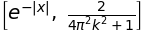

In [21]:
def demo_5a():
    
    x = sympy.Symbol('x', real=True)
    k = sympy.Symbol('k', real=True)
    func = sympy.exp(-sympy.Abs(x))
    ft = sympy.fourier_transform(func,x,k)
    display([func,ft])
demo_5a()

__Exercise a__

Find the Fourier transform of a Gaussian

In [22]:
def exercise_5a():
    
    x = sympy.Symbol('x', real=True)
    k = sympy.Symbol('k', real=True)
    func = sympy.exp(-x**2)
    
    answer = 0
    display(answer)
    print(verify_2.verify_5a(answer))
exercise_5a()

False


# Section 6 - Differential Equations

Solving differential equations

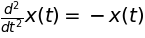

In [23]:
def demo_6a():
    
    x = sympy.Function('x', real=True)
    t = sympy.Symbol('t', real=True)
    
    eqn = sympy.Eq(x(t).diff(t,2), -x(t))
    sol = sympy.dsolve(eqn, x(t))
    
    display(eqn)
    display(sol)
    
demo_6a()

Including initial conditions

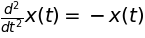

⎧         ⎛d       ⎞│      ⎫
⎨x(0): 0, ⎜──(x(t))⎟│   : 1⎬
⎩         ⎝dt      ⎠│t=0   ⎭

In [24]:
def demo_6b():
    
    x = sympy.Function('x', real=True)
    t = sympy.Symbol('t', real=True)
    
    init_cond = {x(0):0,
                 x(t).diff(t).subs(t,0):1}
    eqn = sympy.Eq(x(t).diff(t,2), -x(t))
    sol = sympy.dsolve(eqn, x(t),
                      ics=init_cond)
    
    display(eqn)
    display(init_cond)
    display(sol)
    
demo_6b()

Coupled differential equations

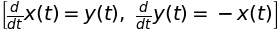

In [25]:
def demo_6c():
    
    x = sympy.Function('x', real=True)
    y = sympy.Function('y', real=True)
    t = sympy.Symbol('t', real=True)
    
    eqns = [sympy.Eq(x(t).diff(t),y(t)),
            sympy.Eq(y(t).diff(t),-x(t))]
    display(eqns)
    sol = sympy.dsolve(eqns, [x(t), y(t)])
    display(sol)
demo_6c()

__Exercise a__

Find the solution to the equation $\ddot{x} = - x + \sin \left(2 t\right)$ with initial conditions $x \left(0\right) = \dot{x} \left(0\right) = 0$

In [26]:
def exercise_6a():
    
    x = sympy.Function('x', real=True)
    t = sympy.Symbol('t', real=True)
    
    answer = sympy.Eq(x(t),0)
    display(answer)
    print(verify_2.verify_6a(answer))
    
exercise_6a()

False


# Review Problems

## Shapiro Time Delay

When light passes closer to a massive object, it moves slower and takes longer to reach a distant observer. Let us consider a photon passing within a distance $b$ of a point mass $M$. Let us find the time as a function of the angle between the photon's velocity and position relative to the massive object. We can assume that $GM/c^2 b \ll 1$, so we can only consider leading terms in mass.

Schwartzschild metric


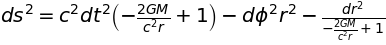

Light like trajectory


trajectory


shapiro time delay


In [27]:
def try_it_yourself_7a():
    
    ds = sympy.Symbol('ds', real=True) # Distance differential
    G = sympy.Symbol('G', positive=True) # Gravitation constant
    M = sympy.Symbol('M', positive=True) # Mass
    c = sympy.Symbol('c', positive=True) # Speed of light
    r = sympy.Symbol('r', positive=True) # Distance
    dt = sympy.Symbol('dt', positive=True) # Time differential
    dr = sympy.Symbol('dr', positive=True) # Radius differential
    df = sympy.Symbol(r'd\phi', positive=True) # Angle differential
    f = sympy.Symbol('phi', positive=True) # Angle
    b = sympy.Symbol('b', positive=True) # Impact parameter
    xi = sympy.Symbol('xi', positive=True) # Auxiliary variable
    
    schwartzschild_metric = sympy.Eq(ds**2,(1-2*G*M/c**2/r)*c**2*dt**2 - dr**2/(1-2*G*M/c**2/r)-df**2*r**2)
    print('Schwartzschild metric')
    display(schwartzschild_metric)
    
    light_like = sympy.Eq(ds,0)
    print('Light like trajectory')
    display(light_like)
    
    trajctory = sympy.Eq(r*sympy.sin(f),b)
    print('trajectory')
    display(trajctory)
    
    print('shapiro time delay')
    # Enter you solution
    answer = 0
    display(answer)
    
try_it_yourself_7a()

The solution

Schwartzschild metric


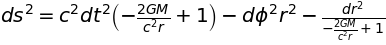

Light like trajectory


trajectory


shapiro time delay


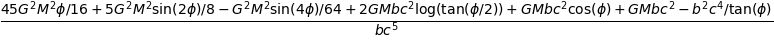

We have three kinds of terms. The first kind is proportional to b/c. It represents the light travel time in flat spacetime, and perstits even without a mass, so it is uninteresting. The second kind are proportional to GM/c^3, but not on the impact parameter. These represent a constant time delay for photons at all impact parameters, so they don't carry any important information. Finally, we have terms of the form G^2 M^2/c^4 b that are the only relevnat ones.


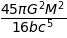

In [28]:
def demo_7a():
    
    ds = sympy.Symbol('ds', real=True) # Distance differential
    G = sympy.Symbol('G', positive=True) # Gravitation constant
    M = sympy.Symbol('M', positive=True) # Mass
    c = sympy.Symbol('c', positive=True) # Speed of light
    r = sympy.Symbol('r', positive=True) # Distance
    dt = sympy.Symbol('dt', positive=True) # Time differential
    dr = sympy.Symbol('dr', positive=True) # Radius differential
    df = sympy.Symbol(r'd\phi', positive=True) # Angle differential
    f = sympy.Symbol('phi', positive=True) # Angle
    b = sympy.Symbol('b', positive=True) # Impact parameter
    xi = sympy.Symbol('xi', positive=True) # Auxiliary variable
    
    schwartzschild_metric = sympy.Eq(ds**2,(1-2*G*M/c**2/r)*c**2*dt**2 - dr**2/(1-2*G*M/c**2/r)-df**2*r**2)
    print('Schwartzschild metric')
    display(schwartzschild_metric)
    
    light_like = sympy.Eq(ds,0)
    print('Light like trajectory')
    display(light_like)
    
    trajctory = sympy.Eq(r*sympy.sin(f),b)
    print('trajectory')
    display(trajctory)
    
    print('shapiro time delay')
    # Enter you solution
    temp = schwartzschild_metric
    temp = temp.subs(light_like.lhs, light_like.rhs)
    temp = temp.subs(sympy.solve(trajctory,r,dict=True)[0])
    temp = temp.subs(dr,df*sympy.solve(trajctory,r)[0].diff(f))
    temp = sympy.solve(temp, dt)[0]/df
    temp = sympy.series(temp,M,0,3).removeO()
    temp = temp.integrate(f).simplify()
    display(temp)
    print("We have three kinds of terms. The first kind is proportional to b/c. It represents the light travel time in flat spacetime, and perstits even without a mass, so it is uninteresting. The second kind are proportional to GM/c^3, but not on the impact parameter. These represent a constant time delay for photons at all impact parameters, so they don't carry any important information. Finally, we have terms of the form G^2 M^2/c^4 b that are the only relevnat ones.")
    temp = temp.diff(M,2)*M**2/2
    temp = temp.subs(f,sympy.pi) - temp.subs(f,0)
    display(temp)
    
demo_7a()